In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos e Ferramentas do Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Configuração de estilo (opcional, para gráficos mais bonitos)
sns.set()
print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


In [ ]:
# 1. URL e nomes das colunas
url = "https://archive.ics.uci.edu/static/public/105/data.csv"
col_names = [
    'Class Name', 'handicapped-infants', 'water-project-cost-sharing',
    'adoption-of-the-budget-resolution', 'physician-fee-freeze',
    'el-salvador-aid', 'religious-groups-in-schools',
    'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
    'mx-missile', 'immigration', 'synfuels-corporation-cutback',
    'education-spending', 'superfund-right-to-sue', 'crime',
    'duty-free-exports', 'export-administration-act-south-africa'
]
df = pd.read_csv(url, names=col_names, header=None)

# 2. Definir os mapas de conversão
vote_map = {'y': 1, 'n': 0} # '?' vira NaN
class_map = {'democrat': 0, 'republican': 1} # '?' ou outros viram NaN

# 3. Converter TODAS as colunas
df['Class Name'] = df['Class Name'].map(class_map)
for col in df.columns[1:]:
    df[col] = df[col].map(vote_map)

# 4. ETAPA CRÍTICA: Remover linhas onde o ALVO (y) é NaN.
#    Não podemos treinar ou testar sem a resposta correta.
print(f"Tamanho antes da limpeza de 'y': {df.shape}")
df.dropna(subset=['Class Name'], inplace=True)
print(f"Tamanho após a limpeza de 'y': {df.shape}")

# 5. Verificar o DataFrame
print(f"\nNaNs na coluna 'Class Name': {df['Class Name'].isnull().sum()}")
print(f"NaNs restantes nas colunas de votos: {df.drop('Class Name', axis=1).isnull().sum().sum()}")
display(df.head())

Tamanho antes da limpeza de 'y': (436, 17)
Tamanho após a limpeza de 'y': (435, 17)

NaNs na coluna 'Class Name': 0
NaNs restantes nas colunas de votos: 392


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
3,0.0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [ ]:
# Estatísticas principais
print("Estatísticas Descritivas (após limpeza do alvo):")
display(df.describe())

# Verificar o balanceamento das classes
print("\nContagem de Classes:")
print(df['Class Name'].value_counts())

Estatísticas Descritivas (após limpeza do alvo):


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435.000000,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.386207,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.487440,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Contagem de Classes:
Class Name
0.0    267
1.0    168
Name: count, dtype: int64


In [7]:
# Separar Features (X) e Target (y)
X = df.drop('Class Name', axis=1)
y = df['Class Name']

# Dividir os dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar os NaNs ANTES da imputação
print(f"Formato de X_train (com NaNs): {X_train.shape}")
print(f"NaNs em X_train (antes de imputar): {X_train.isnull().sum().sum()}")
print(f"NaNs em y_train: {y_train.isnull().sum().sum()}") # Deve ser 0
print(f"NaNs em X_test (antes de imputar): {X_test.isnull().sum().sum()}")
print(f"NaNs em y_test: {y_test.isnull().sum().sum()}") # Deve ser 0

Formato de X_train (com NaNs): (304, 16)
NaNs em X_train (antes de imputar): 297
NaNs em y_train: 0
NaNs em X_test (antes de imputar): 95
NaNs em y_test: 0


In [8]:
# Usamos 'most_frequent' (moda) pois os dados são categóricos (0/1).
# Isso evita vazamento de dados (data leakage).

from sklearn.impute import SimpleImputer

# 1. Criar o imputer.
imputer = SimpleImputer(strategy='most_frequent')

# 2. Aprender a moda (valor mais frequente) APENAS nos dados de TREINO
imputer.fit(X_train)

# 3. Aplicar (transformar) os dados de treino e teste
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 4. Verificar se funcionou
print(f"NaNs em X_train após imputação: {np.isnan(X_train_imputed).sum()}")
print(f"NaNs em X_test após imputação: {np.isnan(X_test_imputed).sum()}")

NaNs em X_train após imputação: 0
NaNs em X_test após imputação: 0



Acurácia do Modelo (BernoulliNB com Imputação): 90.84%

Relatório de Classificação (BernoulliNB):
              precision    recall  f1-score   support

    Democrat       0.93      0.93      0.93        85
  Republican       0.87      0.87      0.87        46

    accuracy                           0.91       131
   macro avg       0.90      0.90      0.90       131
weighted avg       0.91      0.91      0.91       131



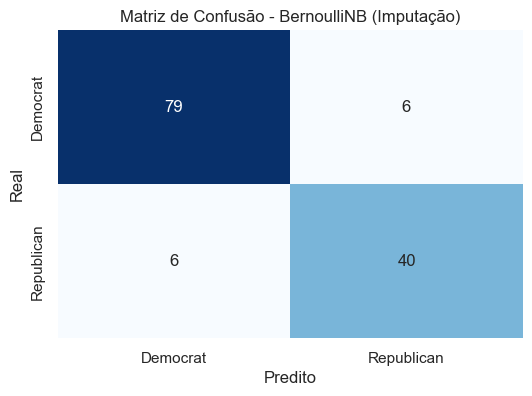

In [9]:
# 1. Instanciar o modelo
model_b = BernoulliNB()

# 2. Treinar o modelo nos dados imputados
model_b.fit(X_train_imputed, y_train)

# 3. Fazer previsões no conjunto de teste imputado
y_pred_b = model_b.predict(X_test_imputed)

# 4. Avaliar
acc_b = accuracy_score(y_test, y_pred_b)
print(f"\nAcurácia do Modelo (BernoulliNB com Imputação): {acc_b:.2%}\n")

print("Relatório de Classificação (BernoulliNB):")
print(classification_report(y_test, y_pred_b, target_names=['Democrat', 'Republican']))

# 5. Matriz de Confusão Visual
mat = confusion_matrix(y_test, y_pred_b)
plt.figure(figsize=(6, 4))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Democrat', 'Republican'],
            yticklabels=['Democrat', 'Republican'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - BernoulliNB (Imputação)')
plt.show()

In [10]:
print("="*50)
print("INÍCIO DO COMPARATIVO DE CLASSIFICADORES NB")
print("="*50)

# --- Teste com GaussianNB ---
# (Assume que as features são contínuas)
print("\nTestando GaussianNB...")
model_g = GaussianNB()
model_g.fit(X_train_imputed, y_train)
y_pred_g = model_g.predict(X_test_imputed)
acc_g = accuracy_score(y_test, y_pred_g)

print(f"Acurácia GaussianNB: {acc_g:.2%}")
print(classification_report(y_test, y_pred_g, target_names=['Democrat', 'Republican'], zero_division=0))


# --- Teste com MultinomialNB ---
# (Projetado para contagens discretas)
print("\nTestando MultinomialNB...")
model_m = MultinomialNB()
model_m.fit(X_train_imputed, y_train)
y_pred_m = model_m.predict(X_test_imputed)
acc_m = accuracy_score(y_test, y_pred_m)

print(f"Acurácia MultinomialNB: {acc_m:.2%}")
print(classification_report(y_test, y_pred_m, target_names=['Democrat', 'Republican'], zero_division=0))


# --- Relembrar o BernoulliNB ---
print("\nResultado do BernoulliNB (Modelo original)...")
print(f"Acurácia BernoulliNB: {acc_b:.2%}") 
print(classification_report(y_test, y_pred_b, target_names=['Democrat', 'Republican'], zero_division=0))

INÍCIO DO COMPARATIVO DE CLASSIFICADORES NB

Testando GaussianNB...
Acurácia GaussianNB: 93.13%
              precision    recall  f1-score   support

    Democrat       0.95      0.94      0.95        85
  Republican       0.89      0.91      0.90        46

    accuracy                           0.93       131
   macro avg       0.92      0.93      0.92       131
weighted avg       0.93      0.93      0.93       131


Testando MultinomialNB...
Acurácia MultinomialNB: 90.08%
              precision    recall  f1-score   support

    Democrat       0.93      0.92      0.92        85
  Republican       0.85      0.87      0.86        46

    accuracy                           0.90       131
   macro avg       0.89      0.89      0.89       131
weighted avg       0.90      0.90      0.90       131


Resultado do BernoulliNB (Modelo original)...
Acurácia BernoulliNB: 90.84%
              precision    recall  f1-score   support

    Democrat       0.93      0.93      0.93        85
  Repub

C:\Users\usuario\AppData\Local\Temp\ipykernel_39564\3223395875.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


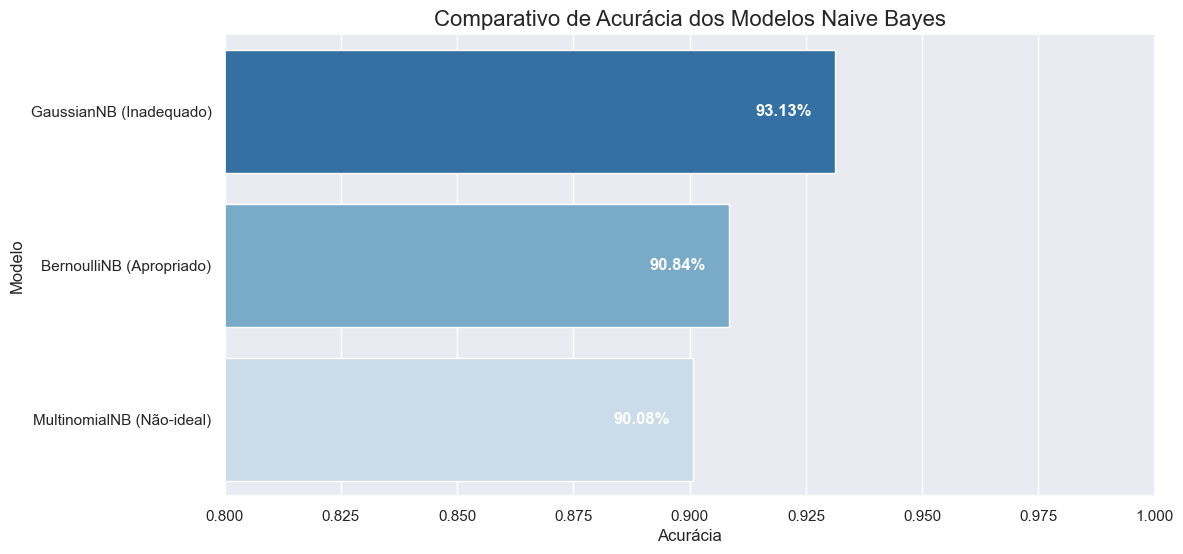

In [11]:
# 1. Criar um DataFrame com os resultados
model_names = ['BernoulliNB (Apropriado)', 'GaussianNB (Inadequado)', 'MultinomialNB (Não-ideal)']
accuracies = [acc_b, acc_g, acc_m] # Variáveis calculadas nos blocos 7 e 8

df_results = pd.DataFrame({
    'Modelo': model_names,
    'Acurácia': accuracies
})

# 2. Ordenar o DataFrame da melhor para a pior acurácia
df_results = df_results.sort_values(by='Acurácia', ascending=False)

# 3. Criar o gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Acurácia',
    y='Modelo',
    data=df_results,
    palette='Blues_r'
)

# 4. Adicionar rótulos e título
plt.title('Comparativo de Acurácia dos Modelos Naive Bayes', fontsize=16)
plt.xlabel('Acurácia', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.xlim(0.8, 1.0) # Ajustar o limite do eixo X para focar na diferença

# 5. Adicionar os valores exatos nas barras
for p in barplot.patches:
    width = p.get_width()
    plt.text(width - 0.005,
             p.get_y() + p.get_height() / 2,
             f'{width:.2%}',
             ha='right',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=12)

# 6. Salvar e mostrar o gráfico
# plt.savefig('comparativo_modelos_nb.png', dpi=300, bbox_inches='tight')
plt.show()